In [35]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# from pandas import HDFStore, read_hdf
# from pathlib import Path

import pickle
import requests, json

# from tabulate import tabulate

pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 500)

from catboost import CatBoostClassifier

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    from sklearn import preprocessing

In [2]:
data_dir = './dataPool/'
csv_file = '1_CoverageGroupSuggestion.csv'

read_csv = data_dir + csv_file

In [3]:
df_group_raw = pd.read_csv(read_csv, encoding ='utf_8')

In [4]:
df_group_raw = df_group_raw.iloc[:, :6]

display (df_group_raw.head(3))
print(df_group_raw.shape)

,Group,CnaeSession,Uf,FundationDate,Equity,RefYearMonth
0,G1,CONSTRUÇÃO,ES,1990,7320000,201806
1,G1,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",RR,1991,1500000,201802
2,G3,SAÚDE HUMANA E SERVIÇOS SOCIAIS,SC,2015,1500000,201710


(49999, 6)


In [5]:
for i in list(df_group_raw):
    print(i)
    print(df_group_raw[i].value_counts())

Group
G2    10102
G1    10057
G4    10028
G3     9989
G5     9823
Name: Group, dtype: int64
CnaeSession
ADMINISTRAÇÃO PÚBLICA, DEFESA E SEGURIDADE SOCIAL                    2463
ELETRICIDADE E GÁS                                                   2450
ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕES EXTRATERRITORIAIS    2445
INDÚSTRIAS EXTRATIVAS                                                2441
ATIVIDADES IMOBILIÁRIAS                                              2431
ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS RELACIONADOS           2422
EDUCAÇÃO                                                             2406
ÁGUA, ESGOTO, ATIVIDADES DE GESTÃO DE RESÍDUOS E DESCONTAMINAÇÃO     2396
ALOJAMENTO E ALIMENTAÇÃO                                             2394
COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS           2388
AGRICULTURA, PECUÁRIA, PRODUÇÃO FLORESTAL, PESCA E AQÜICULTURA       2387
OUTRAS ATIVIDADES DE SERVIÇOS                                        2387
SAÚDE HU

In [6]:
df = df_group_raw.iloc[:, :5]
df

,Group,CnaeSession,Uf,FundationDate,Equity
0,G1,CONSTRUÇÃO,ES,1990,7320000
1,G1,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",RR,1991,1500000
2,G3,SAÚDE HUMANA E SERVIÇOS SOCIAIS,SC,2015,1500000
3,G3,SERVIÇOS DOMÉSTICOS,PI,2001,1500000
4,G4,"ÁGUA, ESGOTO, ATIVIDADES DE GESTÃO DE RESÍDUOS...",RN,1993,5320000
5,G2,"ÁGUA, ESGOTO, ATIVIDADES DE GESTÃO DE RESÍDUOS...",RR,1998,5320000
6,G5,"ARTES, CULTURA, ESPORTE E RECREAÇÃO",CE,1990,2320000
7,G4,"ADMINISTRAÇÃO PÚBLICA, DEFESA E SEGURIDADE SOCIAL",AM,1998,500000
8,G3,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,SC,2016,5320000
9,G1,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",TO,1998,1500000


## Features and label

In [7]:
df_data = df.drop(columns=['Group'])
df_label_cat = df.Group

In [8]:
display (df_data.head(3))
display (df_label_cat.head(3))

,CnaeSession,Uf,FundationDate,Equity
0,CONSTRUÇÃO,ES,1990,7320000
1,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",RR,1991,1500000
2,SAÚDE HUMANA E SERVIÇOS SOCIAIS,SC,2015,1500000


0    G1
1    G1
2    G3
Name: Group, dtype: object

## (Optional) One-hot encoding (No need for our current project)

In [9]:
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
d

defaultdict(sklearn.preprocessing.label.LabelEncoder, {})

### Assign encoder

In [10]:
df_dataEncoder = df.drop(columns=['Group','Equity'])[:4]
df_dataEncoder

,CnaeSession,Uf,FundationDate
0,CONSTRUÇÃO,ES,1990
1,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",RR,1991
2,SAÚDE HUMANA E SERVIÇOS SOCIAIS,SC,2015
3,SERVIÇOS DOMÉSTICOS,PI,2001


In [11]:
df_encoded = df_dataEncoder.apply(lambda x: d[x.name].fit_transform(x))
display(df_encoded)
print(d)
print(d['CnaeSession'])

,CnaeSession,Uf,FundationDate
0,1,0,0
1,0,2,1
2,2,3,3
3,3,1,2


defaultdict(<class 'sklearn.preprocessing.label.LabelEncoder'>, {'CnaeSession': LabelEncoder(), 'Uf': LabelEncoder(), 'FundationDate': LabelEncoder()})
LabelEncoder()


In [12]:
df_encoded_rev = df_encoded.apply(lambda x: d[x.name].inverse_transform(x))
display(df_encoded_rev)

,CnaeSession,Uf,FundationDate
0,CONSTRUÇÃO,ES,1990
1,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",RR,1991
2,SAÚDE HUMANA E SERVIÇOS SOCIAIS,SC,2015
3,SERVIÇOS DOMÉSTICOS,PI,2001


### Feature mapping

In [13]:
class feature_mapping(object):
    def __init__(self, d, curr_feat):
        self.d = d
        self.curr_feat = curr_feat
    def getMapping(self):
        mapping_all = dict()
        for one_feat in self.curr_feat:
            mapping_all[one_feat] = dict(zip(d[one_feat].classes_, range(len(d[one_feat].classes_))))
#             mapping_all.append(dict(zip(d[one_feat].classes_, 
#                                     range(len(d[one_feat].classes_)))))          
        return mapping_all
       

In [14]:
myMap = feature_mapping(d, list(df_encoded))
display(myMap.getMapping())
print(myMap.getMapping()['CnaeSession'])
print({k:v for k, v in myMap.getMapping()['CnaeSession'].items() if v == 0})


{'CnaeSession': {'ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS': 0,
  'CONSTRUÇÃO': 1,
  'SAÚDE HUMANA E SERVIÇOS SOCIAIS': 2,
  'SERVIÇOS DOMÉSTICOS': 3},
 'Uf': {'ES': 0, 'PI': 1, 'RR': 2, 'SC': 3},
 'FundationDate': {1990: 0, 1991: 1, 2001: 2, 2015: 3}}

{'ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS': 0, 'CONSTRUÇÃO': 1, 'SAÚDE HUMANA E SERVIÇOS SOCIAIS': 2, 'SERVIÇOS DOMÉSTICOS': 3}
{'ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS': 0}


### End of optional one-hot encoding for feature

## One-hot encoding for label

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_label_cat)
df_label = le.transform(df_label_cat) 

## demo
print (list(le.classes_))
print(list(df_label)[:10])
print(le.inverse_transform([0, 0, 1, 2]))

['G1', 'G2', 'G3', 'G4', 'G5']
[0, 0, 2, 2, 3, 1, 4, 3, 2, 0]
['G1' 'G1' 'G2' 'G3']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_data, df_label, test_size=0.33, random_state=42)

In [17]:
display (X_train.head(3))
display (X_test.head(3))
display (y_train[:3])
display (y_test[:3])

,CnaeSession,Uf,FundationDate,Equity
23990,EDUCAÇÃO,MA,2015,5320000
8729,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,AP,1998,1500000
3451,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,SE,1997,2320000


,CnaeSession,Uf,FundationDate,Equity
33552,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,DF,1998,2320000
9427,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,SC,1998,1500000
199,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",PI,1998,2320000


array([3, 3, 2])

array([4, 1, 2])

In [18]:
# specify the training parameters 
model = CatBoostClassifier(iterations=10, depth=4, learning_rate=1, 
                           loss_function='MultiClass', 
                           custom_metric='AUC', logging_level='Verbose')
#train the model
cat_features_index = [0,1,2]
model.fit(X_train, y_train, cat_features = cat_features_index)
# make the prediction using the resulting model
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)
print("class = ", preds_class)
print("proba = ", preds_proba)

0:	learn: -1.6087396	total: 197ms	remaining: 1.77s
1:	learn: -1.6086073	total: 323ms	remaining: 1.29s
2:	learn: -1.6081945	total: 463ms	remaining: 1.08s
3:	learn: -1.6076275	total: 608ms	remaining: 911ms
4:	learn: -1.6073794	total: 755ms	remaining: 755ms
5:	learn: -1.6069620	total: 890ms	remaining: 593ms
6:	learn: -1.6066075	total: 1.04s	remaining: 446ms
7:	learn: -1.6063936	total: 1.19s	remaining: 297ms
8:	learn: -1.6059271	total: 1.32s	remaining: 147ms
9:	learn: -1.6055691	total: 1.46s	remaining: 0us
class =  [[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [3.]]
proba =  [[0.21077529 0.20827489 0.18677959 0.1915883  0.20258193]
 [0.20832244 0.20511616 0.19173491 0.19783419 0.1969923 ]
 [0.21077529 0.20827489 0.18677959 0.1915883  0.20258193]
 ...
 [0.1994482  0.20476509 0.19768069 0.19695032 0.2011557 ]
 [0.20457674 0.2057273  0.19568606 0.19975461 0.1942553 ]
 [0.19478693 0.20047045 0.19867245 0.20736138 0.19870879]]


In [19]:
print (preds_proba[:10])
print (preds_class[:10])

[[0.21077529 0.20827489 0.18677959 0.1915883  0.20258193]
 [0.20832244 0.20511616 0.19173491 0.19783419 0.1969923 ]
 [0.21077529 0.20827489 0.18677959 0.1915883  0.20258193]
 [0.20543028 0.21200809 0.19500605 0.18903901 0.19851657]
 [0.19907474 0.2046388  0.19803312 0.195204   0.20304934]
 [0.18699455 0.21430772 0.18935953 0.19891355 0.21042465]
 [0.18281488 0.21172345 0.20598473 0.1975673  0.20190963]
 [0.19734252 0.20421955 0.18418747 0.2122244  0.20202606]
 [0.19843165 0.19458062 0.1937228  0.21824286 0.19502206]
 [0.19648116 0.19665389 0.212594   0.19787995 0.196391  ]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [3.]
 [3.]
 [2.]]


In [20]:
from sklearn.metrics import classification_report
print (classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.20      0.31      0.24      3317
          1       0.20      0.35      0.26      3296
          2       0.20      0.13      0.16      3343
          3       0.19      0.16      0.18      3306
          4       0.19      0.05      0.08      3238

avg / total       0.20      0.20      0.18     16500



## Model serialization

In [21]:
import pickle
my_pickle_name = 'model.pkl'

In [22]:
pickle.dump([le, model], open(my_pickle_name, 'wb'))

In [23]:
encoder, modelCatBoost = pickle.load(open(my_pickle_name, 'rb'))
###encoder.classes_

In [24]:
# myPickle_le = 'pickle_le.pkl'
# pickle.dump(le, open(myPickle_le, 'wb'))

# myPickle_model = 'pickle_model.pkl'
# pickle.dump(model, open(myPickle_model, 'wb'))

# import catboost
# check = model.load_model("catBoostClass.mlmodel")

## Output prediction with index and group

In [25]:
def getIndexAndGroup(data_input):
    my_predIndex = modelCatBoost.predict(data_input).astype('int').flatten() ## flatten for narray to list
    my_predGroup = encoder.inverse_transform(my_predIndex)
    print(my_predIndex, my_predGroup)
    return my_predIndex, my_predGroup

## Input data for prediction

### From test dataset

In [26]:
myInput = X_test[:10]
display(myInput)

,CnaeSession,Uf,FundationDate,Equity
33552,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,DF,1998,2320000
9427,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,SC,1998,1500000
199,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",PI,1998,2320000
12447,"TRANSPORTE, ARMAZENAGEM E CORREIO",TO,1991,5320000
39488,ALOJAMENTO E ALIMENTAÇÃO,RO,1997,15320000
42723,SAÚDE HUMANA E SERVIÇOS SOCIAIS,PR,2010,2320000
10822,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,MS,1992,1000000
49497,OUTRAS ATIVIDADES DE SERVIÇOS,AP,1998,15320000
4144,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",SE,1996,2320000
34018,ALOJAMENTO E ALIMENTAÇÃO,PI,1997,2320000


In [27]:
getIndexAndGroup(myInput)

[0 0 0 1 1 1 1 3 3 2] ['G1' 'G1' 'G1' 'G2' 'G2' 'G2' 'G2' 'G4' 'G4' 'G3']


(array([0, 0, 0, 1, 1, 1, 1, 3, 3, 2]),
 array(['G1', 'G1', 'G1', 'G2', 'G2', 'G2', 'G2', 'G4', 'G4', 'G3'],
       dtype=object))

### From manually input

In [28]:
dataInput = {'CnaeSession':'ALOJAMENTO E ALIMENTAÇÃO', 
             'Uf':'RO', 
             'FundationDate':'1997',
             'Equity':15320000,
            }

correcFeatOrder = ['CnaeSession', 'Uf', 'FundationDate', 'Equity']
df_dataInput = pd.DataFrame.from_dict([dataInput])[correcFeatOrder]

display(df_dataInput)

,CnaeSession,Uf,FundationDate,Equity
0,ALOJAMENTO E ALIMENTAÇÃO,RO,1997,15320000


In [29]:
getIndexAndGroup(df_dataInput)

[1] ['G2']


(array([1]), array(['G2'], dtype=object))

### From flask

In [30]:
url = "http://localhost:5000/model1"
data = json.dumps(dataInput)
print(data)
r = requests.post(url, data)

print(r.json())

{"CnaeSession": "ALOJAMENTO E ALIMENTA\u00c7\u00c3O", "Uf": "RO", "FundationDate": "1997", "Equity": 15320000}
{'attempt': '144', 'predGroup': ['G2'], 'predIndex': [1]}


### From heroku

In [31]:
# urlnew = "https://smartmodel1.herokuapp.com/model1"
# data = json.dumps(dataInput)
# print(data)
# r = requests.post(urlnew, data)
# print(r.json())

### (Optional) Feature Importances

[19.368336   37.3117264  34.1435422   9.17639541]


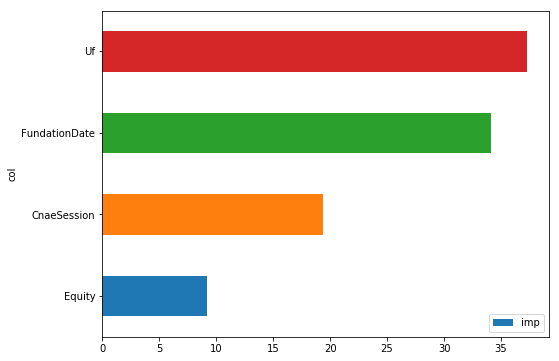

In [36]:
print (model.feature_importances_)
col = list(X_train)
df = pd.DataFrame({'imp': model.feature_importances_, 'col':col})
df = df.sort_values(['imp','col'], ascending=[True, False])
_ = df.plot(kind='barh', x='col', y='imp', figsize=(8,6))
